In [1]:
import mujoco
import mujoco.viewer
from nav2d import Nav2D
import numpy as np
import os
import matplotlib.pyplot as plt


model_json_path = os.path.join(os.getcwd(),"environment_params.json")
test_env = Nav2D(json_file= model_json_path)
model, data = test_env.model, test_env.data

vel_hist = []
avel_hist = []
angle_hist = []

Visualize the rendering using mujoco.viewer passive launch

In [2]:
with mujoco.viewer.launch_passive(model, data) as viewer:
	i = 0
	
	# # Select the camera
	# CAMERA_NAME = "camera"
	# viewer.cam.type = mujoco.mjtCamera.mjCAMERA_FIXED
	# viewer.cam.fixedcamid = model.camera(CAMERA_NAME).id

	# enable viewer options:
	viewer.opt.frame = mujoco.mjtFrame.mjFRAME_BODY
	viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

	while viewer.is_running():
		i+=1
		
		# --- control simulation
		ctrl = np.zeros(test_env.model.nv)
		# ctrl[0] = 0.0005
		# ctrl[2] = 0.005

		ctrl[0] = 0
		ctrl[2] = 0

		# --- simulation
		nobs, rew, term = test_env.step(ctrl)
		# print(test_env.data.qvel)
		viewer.sync()
		
		if (i % 100 == 0):
			# print(nobs[2])
			agent_pose, goal_pose, lidar_obs = test_env._get_obs()
			# print(agent_pose[0:3], goal_pose)

			# ============= agent control debug =============
			# x, y, theta, x_dot, y_dot, theta_dot = agent_pose
			# print(f"theta_{i:7d}: {agent_pose[2]/np.pi*180:6.3f} deg | theta_dot_{i:7d}: {agent_pose[5]/np.pi*180:6.2f} deg/s", end="\r")
			# print(f"Time {i:10d} - Robot position ({x:5.3f},{y:5.3f}) | Goal position {goal_pose}")
			# lin_vel = np.sqrt(x_dot**2 + y_dot**2)

			# angle_hist.append(theta)
			# vel_hist.append(lin_vel)
			# avel_hist.append(theta_dot)
			# print(f"Current robot linear velocities at time {i:7d}: {lin_vel:10.5}", end="\r")

			# ============= goal pose debug =============
			# print(goal_pose)

			# ============= LIDAR obs debug =============
			# print(lidar_obs.shape)

			# ============= termination debug =============
			# if term:
			# 	print(f"Termination condition reached at {i}")
			# 	ctrl[0] = 0.01

			# 	# pause the viewer
			# 	while viewer.is_running():
			# 		viewer.sync()
			# 	break

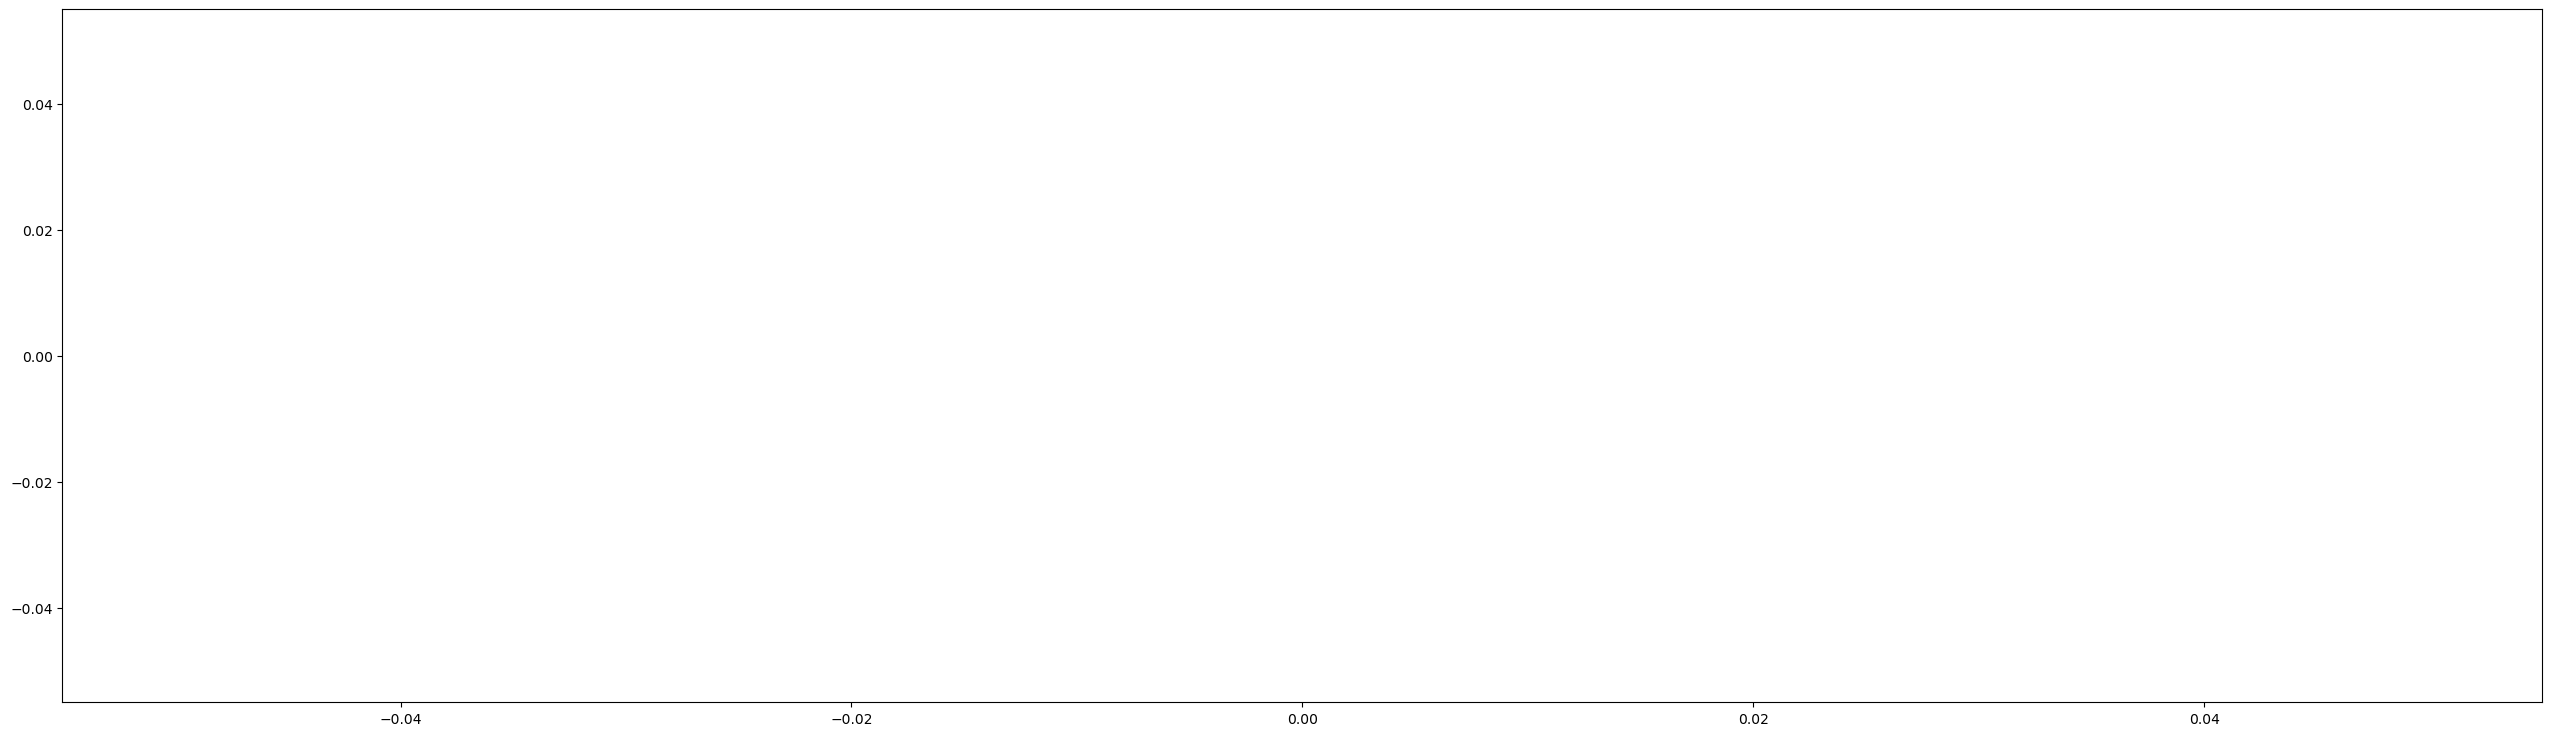

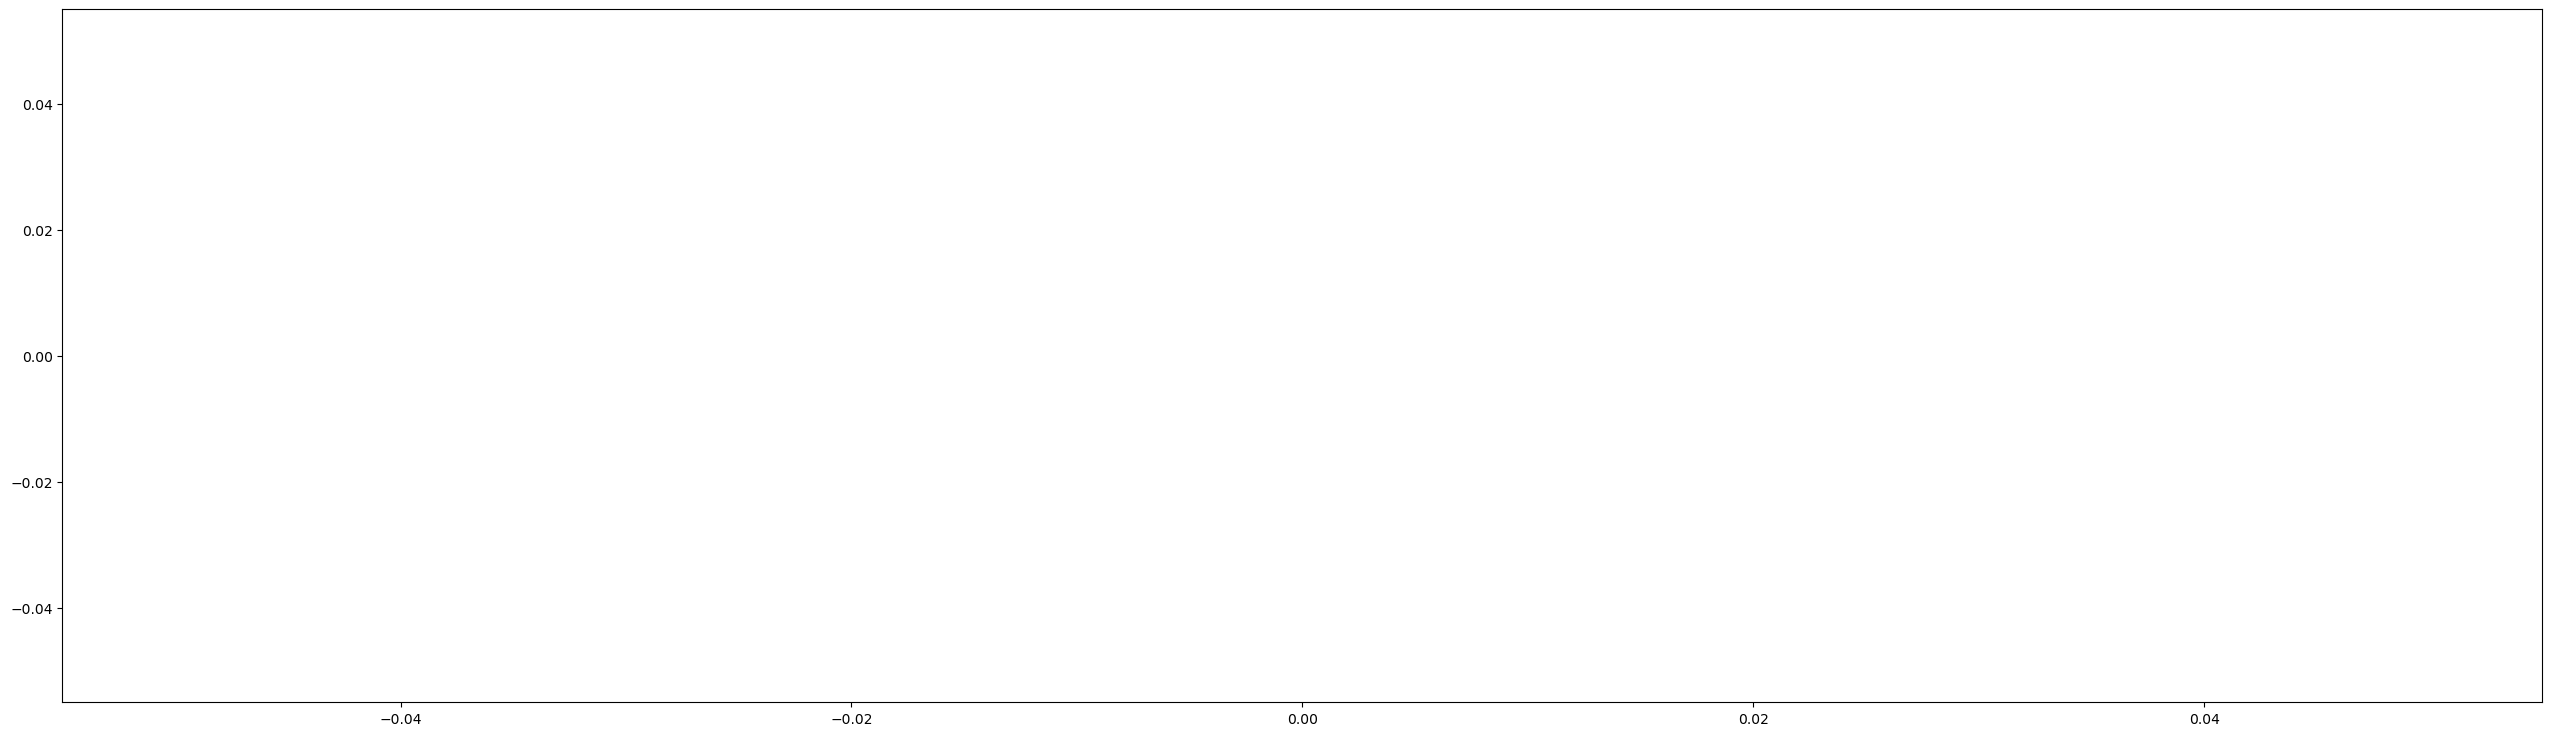

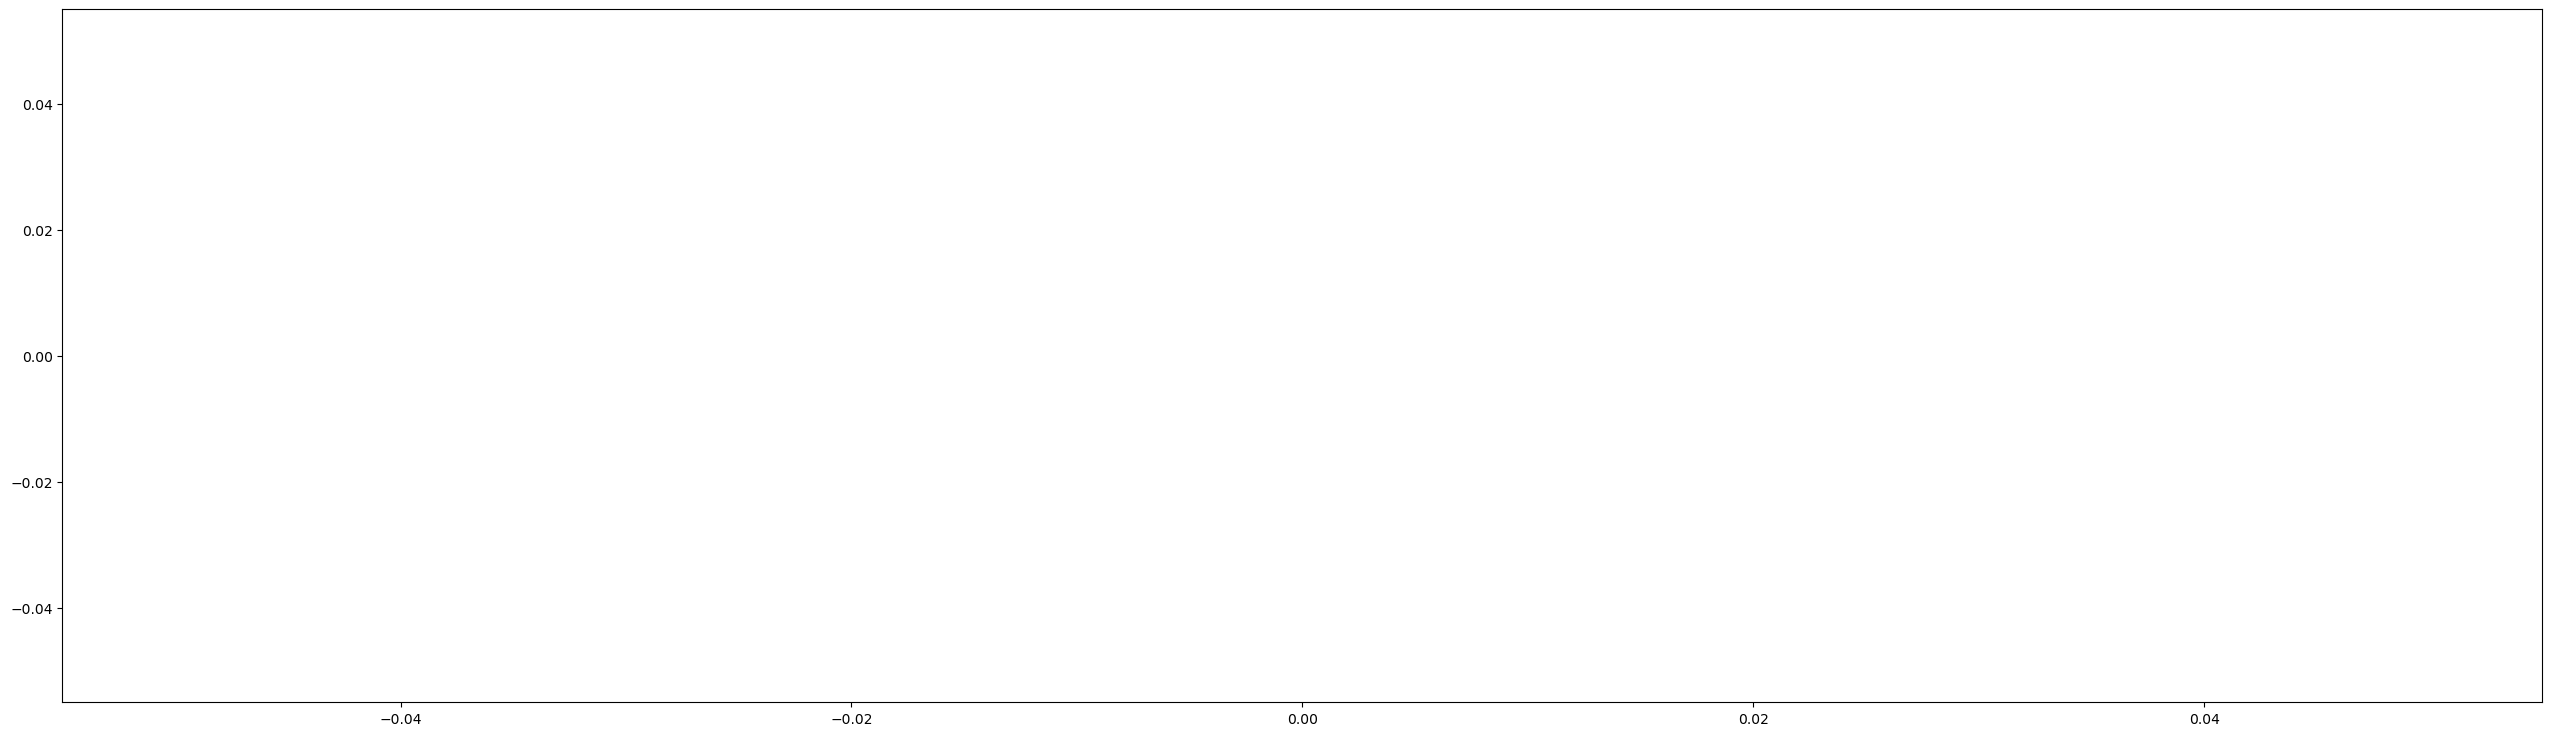

In [5]:
figure = plt.figure(figsize=(32,9))
plt.plot(vel_hist)

figure = plt.figure(figsize=(32,9))
plt.plot(avel_hist)

# figure = plt.figure(figsize=(32,9))
# ctrl_x, ctrl_y, ctrl_z = zip(*ctrl_hist)
# linear_ctrl_norm = np.sqrt(np.square(ctrl_x) + np.square(ctrl_y))
# plt.plot(np.round(linear_ctrl_norm,4))

figure = plt.figure(figsize=(32,9))
plt.plot(angle_hist)

In [6]:
figure = plt.figure(figsize=(32,9))
plt.plot(d_goal_hist)

NameError: name 'd_goal_hist' is not defined

<Figure size 3200x900 with 0 Axes>

In [ ]:
theta_range = np.linspace(0, 2*np.pi, num=100)
action = np.array([0.05, 0, 0], dtype=np.float32)
action_mag_hist = np.zeros(len(theta_range))

for idx, theta in enumerate(theta_range):
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]], dtype=np.float32)
    action_transformed = action
    action_transformed[:2] = rot_matrix @ action[:2]
    # print(action_transformed)
    action_mag_hist[idx] = np.linalg.norm(action_transformed[:2])

action_mag_hist